<a href="https://colab.research.google.com/github/MissoumYoucef/Kaggle_Competition/blob/main/House_prices_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [2]:
# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# Separate target from predictors
X = train_data.drop(['SalePrice'], axis=1)

In [4]:
y = train_data.SalePrice

In [5]:
# Select numerical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('Id')
len(numerical_cols)

36

In [6]:
# # Plot histogram and density plot
# for column in numerical_cols:
#     plt.figure()
#     X[column].hist(bins=20)  # You can customize the number of bins
#     plt.title(column)
#     plt.show()

In [7]:
# Select numerical columns (excluding 'object' type which is often used for categorical data)
numerical_cols = X.select_dtypes(include=['int64', 'float64'])

# Apply log transformation to numerical columns only
log_transformed_numerical = numerical_cols.apply(lambda x: np.log(x + 1))

In [8]:
# Select categorical columns
categorical_cols = X.select_dtypes(include=['object'])

# Combine the transformed numerical columns and the unchanged categorical columns back into one DataFrame
X = pd.concat([log_transformed_numerical, categorical_cols], axis=1)

In [9]:
# # Plot histogram and density plot
# for column in numerical_cols:
#     plt.figure()
#     X[column].hist(bins=20)  # You can customize the number of bins
#     plt.title(column)
#     plt.show()

In [10]:
y = np.log(y)

In [11]:
  # plt.figure()
  # y.hist(bins=20)  # You can customize the number of bins
  # plt.title(column)
  # plt.show()

In [12]:
# # Plot QQ plot
# plt.subplot(1, 2, 2)
# sns.boxplot(y)
# plt.title("Boxplot")
# plt.show()

In [13]:
# Select numerical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('Id')
# Create a boolean DataFrame where True represents the presence of a null value
null_values = X[numerical_cols].isnull()
# Now, if you want to see the rows where any of the numerical columns have null values
rows_with_nulls = X[null_values.any(axis=1)]
# If you want to see the count of nulls in every numerical column
null_counts = X[numerical_cols].isnull().sum()

columns_with_nulls = null_counts[null_counts > 0].index.tolist()
columns_with_nulls

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [14]:
for column in columns_with_nulls:
    # Create a new column for indicating nulls, initialized with 0
    # X[column + 'nan'] = 0

    # Find the indices of rows with null values in the current column
    # null_indices = X[X[column].isnull()].index

    # Set the corresponding 'columnnan' to 1 for rows with null values
    # X.loc[null_indices, column + 'nan'] = 1

    # Compute the median of the current column
    median_value = X[column].median()

    # Fill the null values with the median
    X[column].fillna(median_value, inplace=True)

Text(0.5, 1.0, 'Histogram and Density Plot')

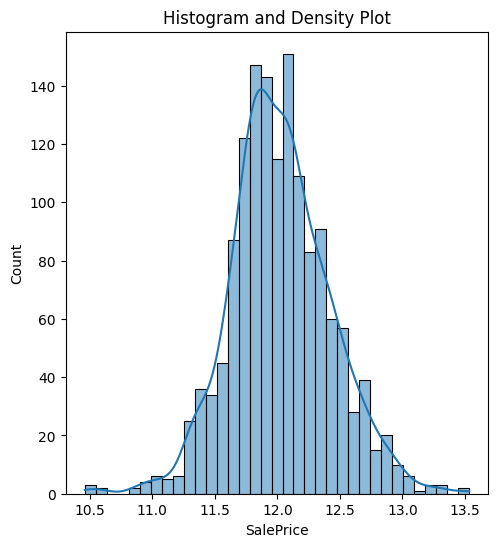

In [15]:
# Plot histogram and density plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True)
plt.title("Histogram and Density Plot")

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [17]:
# Select categorical columns with relatively low cardinality
categorical_cols = [cname for cname in X.columns if X[cname].nunique() < 10 and X[cname].dtype == "object"]
len(categorical_cols)

40

In [18]:
categorical_cols = X.select_dtypes(include=['object']).columns
# Fill null values with 'missing' in categorical columns
X[categorical_cols] = X[categorical_cols].fillna('missing')

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

In [ ]:
for column in categorical_cols:
      unique_values = X[column].unique()
      # print(f"Unique values in column '{column}': {unique_values}")

In [21]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

In [22]:
# Apply the encoder to each column
for column in categorical_cols:
    X[column] = encoder.fit_transform(X[[column]])
# Display the encoded DataFrame
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.693147,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
1,1.098612,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
2,1.386294,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
3,1.609438,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,...,5.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,0.0
4,1.791759,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7.284135,4.110874,4.143135,8.976894,1.945910,1.791759,7.600902,7.601402,0.000000,0.000000,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
1456,7.284821,3.044522,4.454347,9.486152,1.945910,1.945910,7.590347,7.595387,4.787492,6.673298,...,1.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,8.0,4.0
1457,7.285507,4.262680,4.204693,9.109746,2.079442,2.302585,7.571474,7.604396,0.000000,5.620401,...,1.0,1.0,4.0,4.0,2.0,3.0,0.0,2.0,8.0,4.0
1458,7.286192,3.044522,4.234107,9.181735,1.791759,1.945910,7.576097,7.599401,0.000000,3.912023,...,1.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0


In [23]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [24]:
# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [25]:
# Preprocessing of validation data, get predictions
preds = model.predict(X_valid)

# Evaluate the model
score = mean_squared_error(y_valid, preds, squared=False)
print('RMSE:', score)

RMSE: 0.13608260214511841


In [32]:
categorical_cols = test_data.select_dtypes(include=['object']).columns
# Fill null values with 'missing' in categorical columns
test_data[categorical_cols] = test_data[categorical_cols].fillna('missing')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtFinSF2     1458 non-null   float64
 11  BsmtUnfSF      1458 non-null   float64
 12  TotalBsmtSF    1458 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1457 non-null   float64
 18  BsmtHalf

In [29]:
for column in categorical_cols:
    test_data[column] = encoder.fit_transform(test_data[[column]])

In [36]:
# Select numerical columns
numerical_cols = [cname for cname in test_data.columns if test_data[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('Id')
# Create a boolean DataFrame where True represents the presence of a null value
null_values = test_data[numerical_cols].isnull()
# Now, if you want to see the rows where any of the numerical columns have null values
rows_with_nulls = test_data[null_values.any(axis=1)]
# If you want to see the count of nulls in every numerical column
null_counts = test_data[numerical_cols].isnull().sum()

columns_with_nulls = null_counts[null_counts > 0].index.tolist()
columns_with_nulls

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [37]:
for column in columns_with_nulls:
    # Create a new column for indicating nulls, initialized with 0
    # X[column + 'nan'] = 0

    # Find the indices of rows with null values in the current column
    # null_indices = X[X[column].isnull()].index

    # Set the corresponding 'columnnan' to 1 for rows with null values
    # X.loc[null_indices, column + 'nan'] = 1

    # Compute the median of the current column
    median_value = test_data[column].median()

    # Fill the null values with the median
    test_data[column].fillna(median_value, inplace=True)

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF1     1459 non-null   float64
 10  BsmtFinSF2     1459 non-null   float64
 11  BsmtUnfSF      1459 non-null   float64
 12  TotalBsmtSF    1459 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1459 non-null   float64
 18  BsmtHalf

In [39]:
# Preprocessing of test data, fit model
test_preds = model.predict(test_data)

In [40]:
# Save test predictions to file
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': np.exp(test_preds)})  # Apply inverse of log transformation
output.to_csv('submission.csv', index=False)